# Q no: 01
Write a Python language program that can count the word in the text file.

In [25]:
import time
class WordCount:
    data = ''
    count = 0

    def fileOpen(self, fname, mode):
        with open(fname, mode) as f:
            self.data = f.read()
    
    def countWord(self):
        lst_data = self.data.split(' ')
        for word in lst_data:
            self.count += 1
    
    def getCountWords(self):
        print(f'The total word count is :\n{self.count}')

if __name__ == "__main__":
    # Starting time of ex after input
    start = time.time()
    
    obj = WordCount()
    obj.fileOpen('Data_file.txt', 'r')
    obj.countWord()
    obj.getCountWords()

    # ending time of ex
    end = time.time()

    # get the execution time
    elapsed_time = end - start
    print(f'\nStarting Time: {start}')
    print(f'Starting Time: {end}')
    print(f'\nExecution time: \n{elapsed_time} sec')

The total word count is :
21605

Starting Time: 1667142895.6786163
Starting Time: 1667142895.6876104

Execution time: 
0.008994102478027344 sec


# Qno: 02
Write a Python language program that takes two inputsfrom user, first the name ofthetext file and second input number of instances (of the map function)that will run on the system.

In [6]:
import threading
import time

def countWord(dt, res_list):
    wdict = {}
    for word in dt:
        word = word.lower()
        if(wdict.get(word)):
            wdict[word] += 1
            continue

        wdict[word] = 1
    res_list.append(wdict)
    return res_list
    
def fileOpen(fname, mode):
    with open(fname, mode, encoding='utf8') as f:
        data = f.read()
    return data
    
def divide_chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]
    
def mergeResult(lst, fdic):
    count = 0
    for item in lst:
        for key, value in item.items():
            if(fdic.get(key)):
                fdic[key] += value
                count += value
                continue
            
            fdic[key] = value
            count += value
    return fdic, count            

def main():
    # Starting time of ex after input
    st = time.time()

    # Reading file content
    data = fileOpen(fileName, mode).replace('\n','').split(' ')
    
    length = len(data)
    try:
        chunk = length//instances
    except ZeroDivisionError:
        chunk = 1
    divList = divide_chunks(data, chunk)
    # print(f"{len(divList)} instances created")

    # storing all threads
    threads = list()
    # for storing result
    res_list = list()
    # concat the result in one dict
    fdic = dict()

    for item in range(len(divList)):
        try:
            x = threading.Thread(target=countWord, name=f't{item}', args=(divList[item] ,res_list ,))
            threads.append(x)
            x.start()
        except:
            print("Error: unable to start thread")

    for index, thread in enumerate(threads):
            thread.join()

    # print(f'Result list is :{res_list}')

    fdic, count = mergeResult(res_list, fdic)
    print(f'Total count is :{count}')

    # ending time of ex
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print(f'Execution time: {elapsed_time} seconds')

    return elapsed_time, instances

if __name__ == "__main__":
    etList = list()
    insList = list()
    while True:
        fileName = input("Enter filename to read :")
        if(fileName == ''):
            break

        mode ='r'
        instances = int(input("Enter no of Map instances :"))
        et, ins = main()
        etList.append(et)
        insList.append(ins)
    
    with open('Data_file.txt', 'w') as f:
        f.write(str([etList, insList]))
        f.close()

Enter filename to read :Data_file.txt
Enter no of Map instances :1
Total count is :2
Execution time: 0.0019998550415039062 seconds
Enter filename to read :Data_file.txt
Enter no of Map instances :2
Total count is :2
Execution time: 0.0019986629486083984 seconds
Enter filename to read :


Text(0.5, 0, 'Execution time')

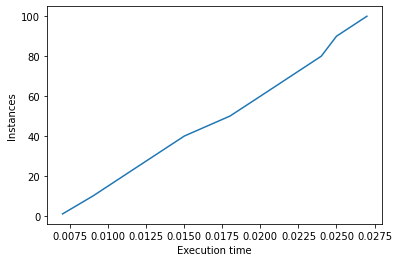

In [8]:
import matplotlib.pyplot as plt
import json

with open('graph_file.txt', 'r') as f:
    res = f.read()
    f.close()
res = json.loads(res)

plt.plot(res[0], res[1])
plt.ylabel('Instances')
plt.xlabel('Execution time')